IMPORTAR DEPENDENCIAS


In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

IMPORTAR CSV + PRERARAR DATAFRAME

In [21]:
data = pd.read_csv('data.csv')
df = pd.DataFrame(data)

# coimbra codigo municipio 603

APOS IMPORTAR DF --> NOVO DATAFRAME SO COM COIMBRA E MOSTRAMOS

In [22]:
coimbra = data[data.codigo_municipio == 603]
coimbra

,ano,municipio,codigo_municipio,num_habitantes,num_crimes,num_vitimas,num_vitima_feminina,num_vitima_masculina,num_vitima_intersexo,num_vitima_idade_3,num_vitima_idade_5,num_vitima_idade_10,num_vitima_idade_17,num_vitima_idade_24,num_vitima_idade_34,num_vitima_idade_44,num_vitima_idade_54,num_vitima_idade_64,num_vitima_idade_mais_65,num_crimes_vitimacao_continuada,num_crimes_vitimacao_nao_continuada
111,2009,Coimbra,603,144 301,356,237,267,64,28,6,3,14,27,26,41,52,43,28,44,185,43
419,2010,Coimbra,603,143 589,346,230,260,62,28,6,3,13,26,25,39,51,42,28,43,180,42
727,2011,Coimbra,603,141 360,372,247,279,67,30,6,3,14,28,27,42,55,45,30,46,193,45
1035,2012,Coimbra,603,139 151,365,243,274,66,29,6,3,14,27,26,42,54,45,29,45,190,44
1343,2013,Coimbra,603,136 964,385,256,289,69,31,6,3,15,29,28,44,57,47,31,48,200,46
1651,2014,Coimbra,603,135 592,394,262,296,71,32,6,4,15,30,28,45,58,48,32,49,205,47
1959,2015,Coimbra,603,134 578,356,237,267,64,28,6,3,14,27,26,41,52,43,28,44,185,43
2267,2016,Coimbra,603,134 348,(R) 342,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!
2575,2017,Coimbra,603,134 156,(R) 321,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!
2883,2018,Coimbra,603,133 724,(R) 276,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!


Substituimos os #VALUE por non values "NaN"

In [23]:
df.replace("#VALUE!", np.nan, inplace=True)
df.replace(" ", np.nan, inplace=True)
# df["num_crimes"].to_string()

coimbra

,ano,municipio,codigo_municipio,num_habitantes,num_crimes,num_vitimas,num_vitima_feminina,num_vitima_masculina,num_vitima_intersexo,num_vitima_idade_3,num_vitima_idade_5,num_vitima_idade_10,num_vitima_idade_17,num_vitima_idade_24,num_vitima_idade_34,num_vitima_idade_44,num_vitima_idade_54,num_vitima_idade_64,num_vitima_idade_mais_65,num_crimes_vitimacao_continuada,num_crimes_vitimacao_nao_continuada
111,2009,Coimbra,603,144 301,356,237,267,64,28,6,3,14,27,26,41,52,43,28,44,185,43
419,2010,Coimbra,603,143 589,346,230,260,62,28,6,3,13,26,25,39,51,42,28,43,180,42
727,2011,Coimbra,603,141 360,372,247,279,67,30,6,3,14,28,27,42,55,45,30,46,193,45
1035,2012,Coimbra,603,139 151,365,243,274,66,29,6,3,14,27,26,42,54,45,29,45,190,44
1343,2013,Coimbra,603,136 964,385,256,289,69,31,6,3,15,29,28,44,57,47,31,48,200,46
1651,2014,Coimbra,603,135 592,394,262,296,71,32,6,4,15,30,28,45,58,48,32,49,205,47
1959,2015,Coimbra,603,134 578,356,237,267,64,28,6,3,14,27,26,41,52,43,28,44,185,43
2267,2016,Coimbra,603,134 348,(R) 342,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!
2575,2017,Coimbra,603,134 156,(R) 321,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!
2883,2018,Coimbra,603,133 724,(R) 276,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!


Removemos caracteres especiais que estavam nos dados para limpeza de dados

In [24]:
df['num_crimes'] = df['num_crimes'].replace(to_replace=['\(R\)', ' ', '-', '┴'], value='', regex=True)
df['num_habitantes'] = df['num_habitantes'].replace(to_replace=['\(R\)', ' ', '-', '┴'], value= '', regex=True)

df.dropna()

coimbra = df[df.codigo_municipio == 603]
coimbra

,ano,municipio,codigo_municipio,num_habitantes,num_crimes,num_vitimas,num_vitima_feminina,num_vitima_masculina,num_vitima_intersexo,num_vitima_idade_3,num_vitima_idade_5,num_vitima_idade_10,num_vitima_idade_17,num_vitima_idade_24,num_vitima_idade_34,num_vitima_idade_44,num_vitima_idade_54,num_vitima_idade_64,num_vitima_idade_mais_65,num_crimes_vitimacao_continuada,num_crimes_vitimacao_nao_continuada
111,2009,Coimbra,603,144301,356,237,267,64,28,6,3,14,27,26,41,52,43,28,44,185,43
419,2010,Coimbra,603,143589,346,230,260,62,28,6,3,13,26,25,39,51,42,28,43,180,42
727,2011,Coimbra,603,141360,372,247,279,67,30,6,3,14,28,27,42,55,45,30,46,193,45
1035,2012,Coimbra,603,139151,365,243,274,66,29,6,3,14,27,26,42,54,45,29,45,190,44
1343,2013,Coimbra,603,136964,385,256,289,69,31,6,3,15,29,28,44,57,47,31,48,200,46
1651,2014,Coimbra,603,135592,394,262,296,71,32,6,4,15,30,28,45,58,48,32,49,205,47
1959,2015,Coimbra,603,134578,356,237,267,64,28,6,3,14,27,26,41,52,43,28,44,185,43
2267,2016,Coimbra,603,134348,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575,2017,Coimbra,603,134156,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2883,2018,Coimbra,603,133724,276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
coimbracasos = coimbra['num_crimes'].astype(float)
vit_fem = coimbra['num_vitima_feminina'].astype(float)
vit_mas = coimbra['num_vitima_masculina'].astype(float)
vit_trx = coimbra['num_vitima_intersexo'].astype(float)
coimbra_hab = coimbra['num_habitantes'].astype(float)

print( f'Media de casos em Coimbra: {coimbracasos.mean()}')
print( f'Fem: {vit_fem.mean()}')
print( f'Masc: {vit_mas.mean()}')
print( f'Trans: {vit_trx.mean()}')



Media de casos em Coimbra: 343.3636363636364
Fem: 266.25
Masc: 63.875
Trans: 28.375


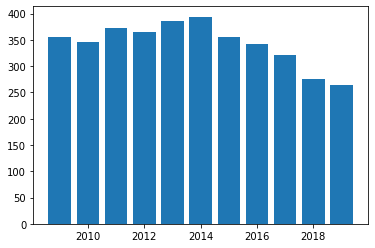

In [26]:

plt.bar(coimbra['ano'], coimbracasos)

plt.show()

In [27]:
coimbracasos.max()

394.0

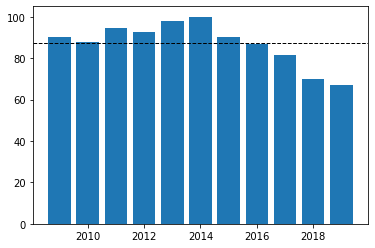

In [28]:
# plt.plot(coimbra['ano'], coimbracasos)
plt.bar(coimbra['ano'], coimbracasos / coimbracasos.max() * 100)
plt.axhline(y=coimbracasos.mean() / coimbracasos.max() * 100, color='k', linestyle='dashed', linewidth=1)
# print(mean)
plt.show()

In [29]:
lisboa = df[df.codigo_municipio == 1106]
porto = df[df.codigo_municipio == 1312]
portocasos = porto['num_crimes'].astype(float)
lisboacasos = lisboa['num_crimes'].astype(float)
porto_hab = porto['num_habitantes'].astype(float)
lisboa_hab = lisboa['num_habitantes'].astype(float)
print(f"Media de casos no Porto: {portocasos.mean()} por ano")
print(f"Media de casos em Lisboa: {lisboacasos.mean()} por ano")


Media de casos no Porto: 932.8181818181819 por ano
Media de casos em Lisboa: 1417.4545454545455 por ano


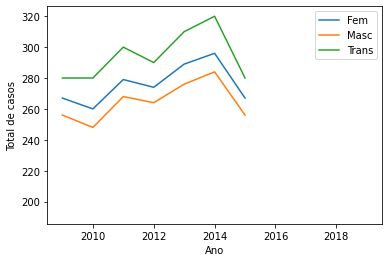

In [34]:

plt.plot(coimbra['ano'], vit_fem)
plt.plot(coimbra['ano'], vit_mas * 4)
plt.plot(coimbra['ano'], vit_trx * 10)
plt.legend(['Fem', 'Masc','Trans'])
plt.xlabel('Ano')
plt.ylabel('Total de casos')
plt.show()

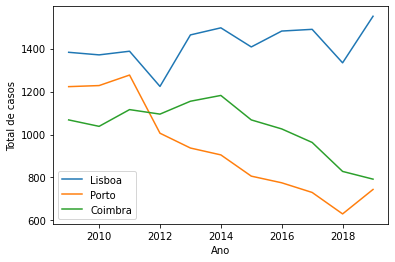

In [36]:

plt.plot(lisboa['ano'], lisboacasos)
plt.plot(porto['ano'], portocasos)
plt.plot(coimbra['ano'], coimbracasos * 3)
plt.legend(['Lisboa', 'Porto','Coimbra'])
plt.xlabel('Ano')
plt.ylabel('Total de casos')
plt.show()

Text(0, 0.5, '% de casos entre sexos')

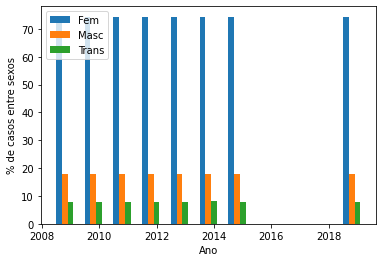

In [32]:

plt.bar(coimbra['ano'] - 0.4, vit_fem / (vit_fem + vit_mas + vit_trx) * 100, 0.2, label = 'xx')
plt.bar(coimbra['ano'] - 0.2, vit_mas / (vit_fem + vit_mas + vit_trx) * 100, 0.2, label = 'xx')
plt.bar(coimbra['ano'] + 0.0, vit_trx / (vit_fem + vit_mas + vit_trx) * 100, 0.2, label = 'xx')
plt.legend(['Fem', 'Masc','Trans'])
plt.xlabel('Ano')
plt.ylabel('% de casos entre sexos')


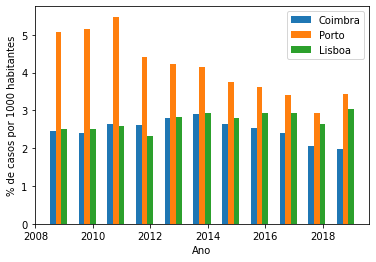

In [33]:

plt.bar(coimbra['ano'] - 0.4, coimbracasos / coimbra_hab * 1000, 0.2, label = 'xx')
plt.bar(coimbra['ano'] - 0.2, portocasos / porto_hab * 1000, 0.2, label = 'xx')
plt.bar(coimbra['ano'] + 0.0, lisboacasos / lisboa_hab * 1000, 0.2, label = 'xx')
plt.legend(['Coimbra', 'Porto','Lisboa'])
plt.xlabel('Ano')
plt.ylabel('% de casos por 1000 habitantes')
plt.show()
